# Timesfm Usage Example

## Loading Timesfm Model

In [1]:
import os 
import sys
import torch
import numpy as np

src_path = os.path.abspath(os.path.join("..", "src"))
if src_path not in sys.path:
    sys.path.insert(0, src_path)

from tsfmproject.model import TimesfmModel
from tsfmproject.dataset import TimesfmDataset
from tsfmproject.utils import load_args

arg_path = "../config/timesfm.json"
args = load_args(arg_path)
tfm = TimesfmModel(**args)


Using device: cuda:3


Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

## Define the datasets

In [ ]:
train_dataset = TimesfmDataset(name="ett", datetime_col='date', path='../src/tsfmproject/models/moment/data/ETTh1.csv', normalize=False,
                              mode='train', context_len=args["config"]["context_len"], horizon_len=args["config"]["horizon_len"])
val_dataset = TimesfmDataset(name="ett", datetime_col='date', path='../src/tsfmproject/models/moment/data/ETTh1.csv', normalize=False, 
                              mode='test', context_len=args["config"]["context_len"], horizon_len=args["config"]["horizon_len"])


795 (7, 512)
20 (7, 512)
torch.Size([4, 7, 512])


## Evaluate the zero-shot forecasting

In [3]:
metrics = tfm.evaluate(val_dataset)
print(metrics)

{'mse': 11.7241335, 'mae': 1.7928314, 'mase': nan, 'mape': 1457.882, 'rmse': 3.4240522, 'nrmse': 0.07456720722071315, 'smape': 0.4612732, 'msis': 0.059605036, 'nd': 0.4837038281224102, 'mwsq': 1.2962868, 'crps': 49.85483104659756}


/nethome/sli999/anaconda3/envs/torch/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/nethome/sli999/anaconda3/envs/torch/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


## Visualization of the evaluation

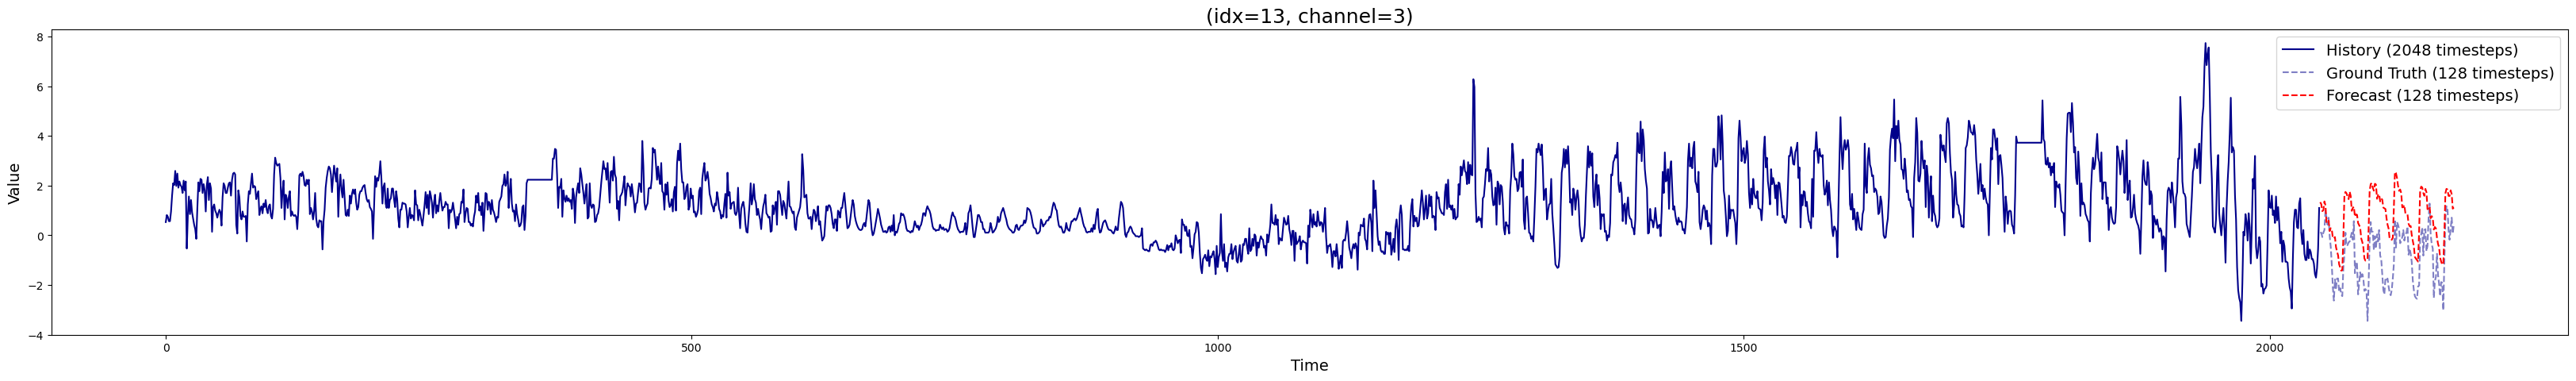

In [4]:
# import matplotlib.pyplot as plt

# # Pick a random channel and time index
# trues = np.array(trues)
# preds = np.array(preds)
# histories = np.array(histories)
# channel_idx = np.random.randint(0, trues.shape[1]) 
# time_index = np.random.randint(0, trues.shape[0]) 

# history = histories[time_index, channel_idx, :] 
# true = trues[time_index, channel_idx, :]
# pred = preds[time_index, channel_idx, :]

# plt.figure(figsize=(12, 4))

# # Plotting the first time series from history
# plt.plot(range(len(history)), history, label='History (128 timesteps)', c='darkblue')

# # Plotting ground truth and prediction
# num_forecasts = len(true)

# offset = len(history)
# plt.plot(range(offset, offset + len(true)), true, label='Ground Truth (64 timesteps)', color='darkblue', linestyle='--', alpha=0.5)
# plt.plot(range(offset, offset + len(pred)), pred, label='Forecast (64 timesteps)', color='red', linestyle='--')

# plt.title(f"ETTh1 (Hourly) -- (idx={time_index}, channel={channel_idx})", fontsize=18)
# plt.xlabel('Time', fontsize=14)
# plt.ylabel('Value', fontsize=14)
# plt.legend(fontsize=14)
# plt.show()
tfm.plot(val_dataset)

## Finetune Timesfm Model on the ETT dataset

In [3]:
finetuned_model = tfm.finetune(train_dataset)

Epoch 0, Loss: 17.304426734770963


KeyboardInterrupt: 

## Test the Finetuned Model

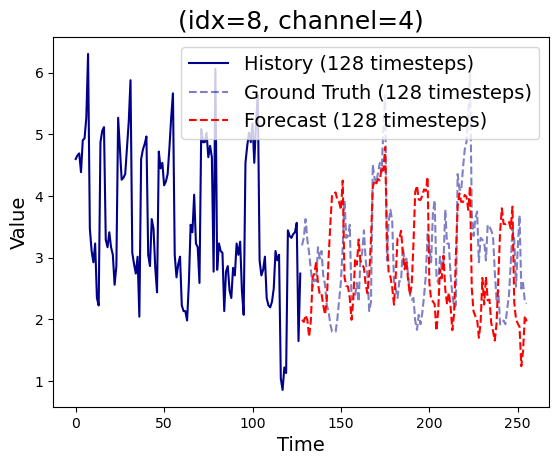

In [ ]:
# avg_loss, trues, preds, histories = tfm.evaluate(val_dataset)
# print("Validation loss:", avg_loss)
tfm.plot(val_dataset)

## Visualization of the evaluation

In [7]:
# import matplotlib.pyplot as plt

# # Pick a random channel and time index
# trues = np.array(trues)
# preds = np.array(preds)
# histories = np.array(histories)
# channel_idx = np.random.randint(0, trues.shape[1]) 
# time_index = np.random.randint(0, trues.shape[0]) 

# history = histories[time_index, channel_idx, :] 
# true = trues[time_index, channel_idx, :]
# pred = preds[time_index, channel_idx, :]

# plt.figure(figsize=(12, 4))

# # Plotting the first time series from history
# plt.plot(range(len(history)), history, label='History (512 timesteps)', c='darkblue')

# # Plotting ground truth and prediction
# num_forecasts = len(true)

# offset = len(history)
# plt.plot(range(offset, offset + len(true)), true, label='Ground Truth (192 timesteps)', color='darkblue', linestyle='--', alpha=0.5)
# plt.plot(range(offset, offset + len(pred)), pred, label='Forecast (192 timesteps)', color='red', linestyle='--')

# plt.title(f"ETTh1 (Hourly) -- (idx={time_index}, channel={channel_idx})", fontsize=18)
# plt.xlabel('Time', fontsize=14)
# plt.ylabel('Value', fontsize=14)
# plt.legend(fontsize=14)
# plt.show()